# Import necessary libraries

In [1]:
library("tidyverse")
library("DataExplorer")
library("ggplot2")
library("ggridges")
library("corrplot")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded



# Distinguish Attributes

In [2]:
enron = read.csv("/kaggle/input/new-records/new_records.csv")
print("Summary of ENRON:")
enron = subset(enron, enron$X != "TOTAL") 
summary(enron)

[1] "Summary of ENRON:"


       X             salary         to_messages      deferral_payments
 Min.   :  0.0   Min.   :    477   Min.   :   57.0   Min.   :-102500  
 1st Qu.:127.2   1st Qu.: 216582   1st Qu.:  792.5   1st Qu.: 116042  
 Median :254.5   Median : 256256   Median : 1596.3   Median : 368726  
 Mean   :254.5   Mean   : 278644   Mean   : 2186.7   Mean   : 860594  
 3rd Qu.:381.8   3rd Qu.: 306733   3rd Qu.: 2647.0   3rd Qu.:1130036  
 Max.   :509.0   Max.   :1091790   Max.   :15149.0   Max.   :6426990  
                 NA's   :26        NA's   :42        NA's   :218      
 total_payments     loan_advances          bonus        
 Min.   :    1279   Min.   :  400000   Min.   :  70000  
 1st Qu.:  833116   1st Qu.: 2000000   1st Qu.: 508718  
 Median : 1321557   Median : 2000000   Median : 750000  
 Mean   : 2636388   Mean   :38334615   Mean   :1160390  
 3rd Qu.: 2200130   3rd Qu.:81525000   3rd Qu.:1246875  
 Max.   :56121254   Max.   :81525000   Max.   :8000000  
 NA's   :5          NA's   :484  

## Analysis
As we can see that the numerous missing data make it difficult to calculate standard deviation, we then transform NAs into number 0.

Warning message in var(if (is.vector(x) || is.factor(x)) x else as.double(x), na.rm = na.rm):
“NAs introduced by coercion”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


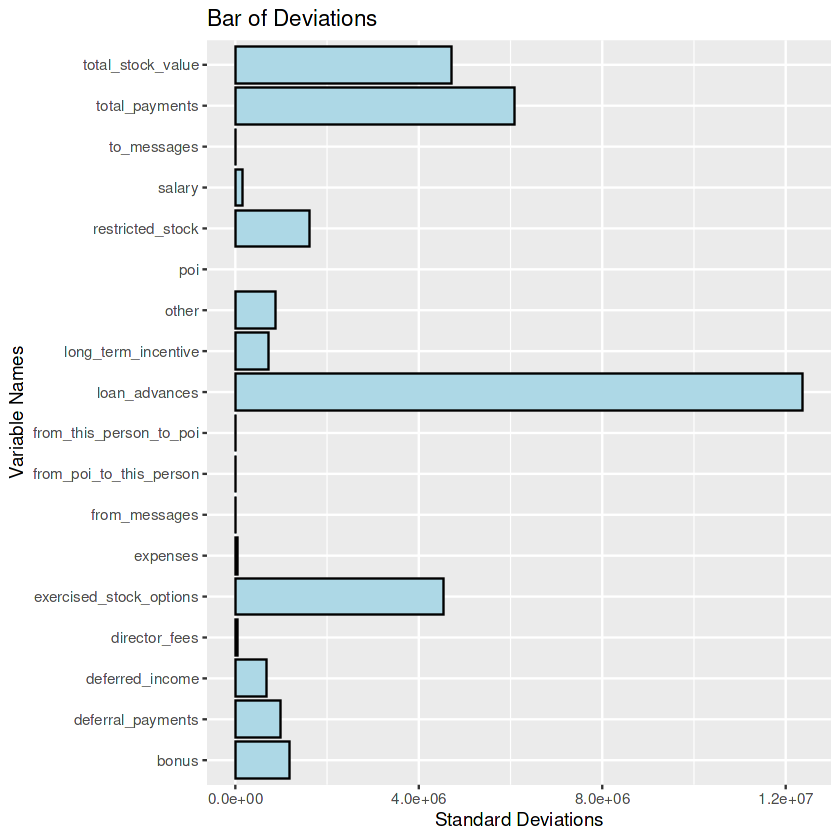

In [3]:
enron[is.na(enron)] = 0

enron_sd_value = select(enron,-c(1,8,18)) %>%
            apply(2,sd) 
enron_sd_name = select(enron,-c(1,8,18)) %>%
            colnames()
enron_sd = data.frame(value = enron_sd_value,
                      name  = enron_sd_name)

ggplot(enron_sd, aes(y = name,x = value))+
    geom_bar(stat = 'identity',
             fill = "lightblue", 
             color = "black", 
             position = position_dodge(0.9)) +
    labs(x = "Standard Deviations", y = "Variable Names", title = "Bar of Deviations")


# Univariate Analysis
In this section, I would like to take 3 variables, namely salary, exercised stock options, and bonus, into consideration. I will give my reasons in the following paragraphs.

Firstly, I assume that salary relates to people's rank in their company since a higher position means a higher salary in most cases.

Based on the assumption above, I may further infer that it should present a relatively falling trend of exercised stock options as the salary data goes up. Leaders of the company should exercise their stock options as little as possible since it is wise for them to keep their stock options as long as they can if they feel confident about the company's development under most circumstances.

Lastly, bonus data should not be too high compared with the value of its corresponding salary data from my perspective.

Additionally, the standard deviations of these 3 variables are relatively higher than those of others according to the previous section, which is also suspective. Hence, I choose them to do univariate analysis.



## Salary

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


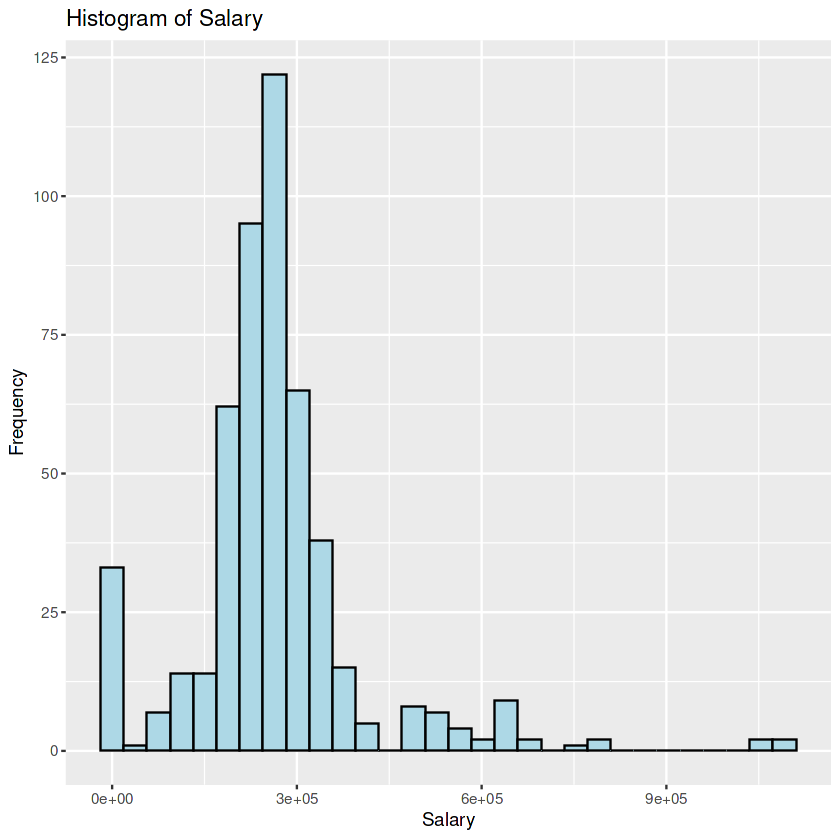

[1] "Names of high salary people:"
[1]  22  35  69 145


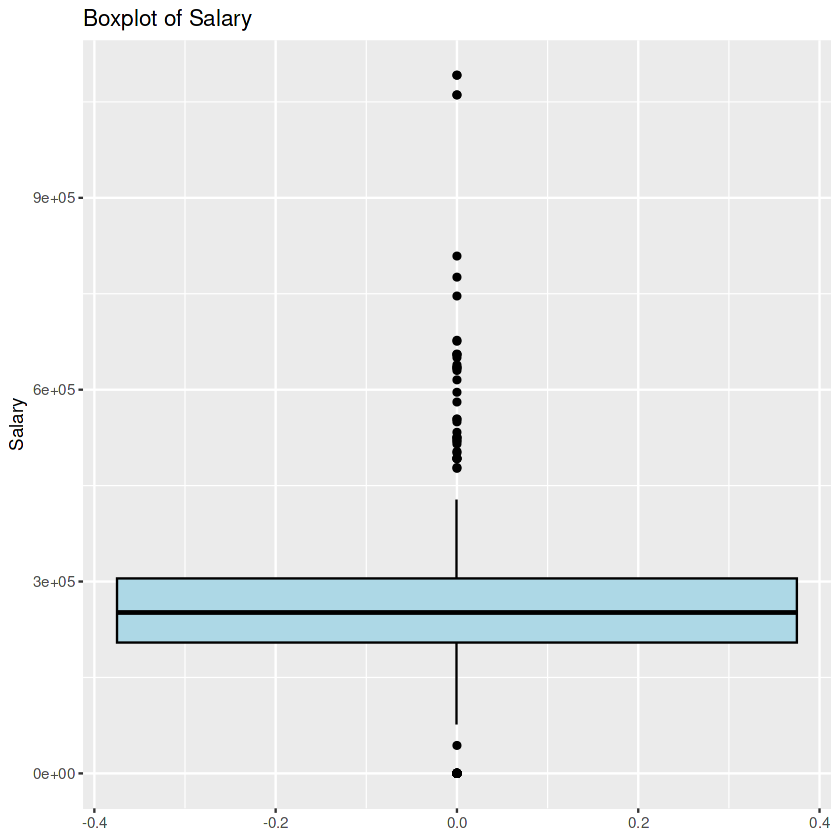

In [4]:
# Histogram
ggplot(enron, aes(x = salary)) +
  geom_histogram(fill = "lightblue", color = "black") +
  labs(x = "Salary", y = "Frequency", title = "Histogram of Salary")

# Boxplot
ggplot(enron, aes(y = salary)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(y = "Salary", title = "Boxplot of Salary")

print("Names of high salary people:")
leaders = subset(enron, enron$salary > 9e5)
print(leaders$X)

# Record candidate outliers.
outliers   = leaders
outliers_uni_S = outliers

## Exercised Stock Options

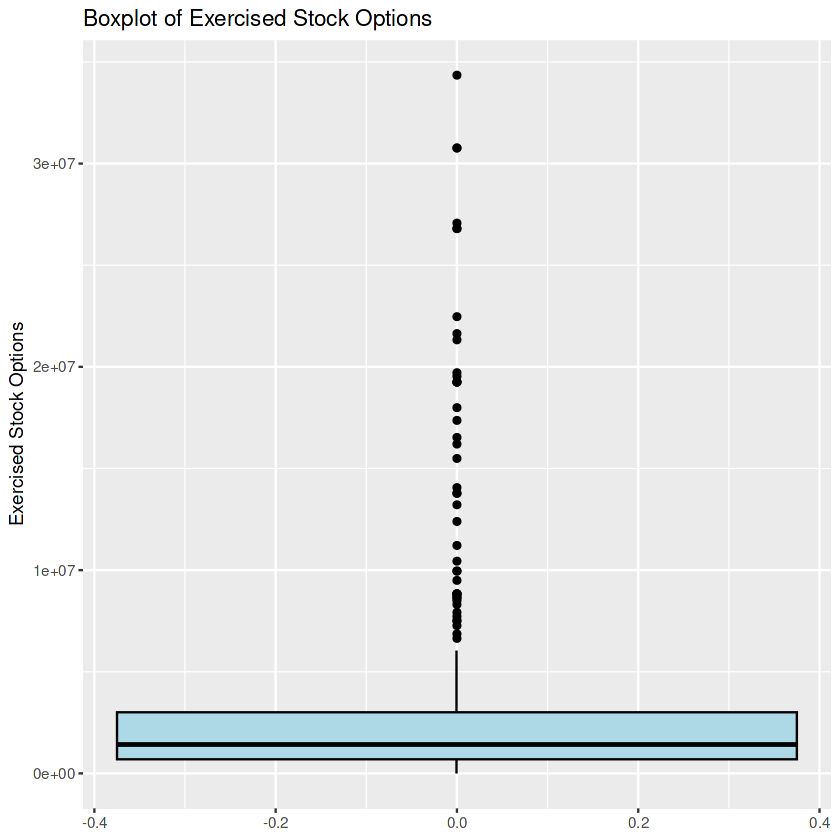

[1] "Names of people exercising stock options much more than others:"
 [1]   0   1   2   3   4   5   7   9  10  11  12  13  19  21  22  23  24  25  26
[20]  27  29  31  33  35  36  37  38  39  40  41  44  45  46  47  48  49  50  51
[39]  53  54  56  57  59  60  68  69  76  79  81  85  95  98 124 125 133 136 137
[58] 138 142 144 145 150 151 173 175 187 198 201 207 225 236 248 253 254 265 275
[77] 291 312 314 331 338 355 373 379 388 395 406 433 436 440 463 467 469 482 483
[96] 502


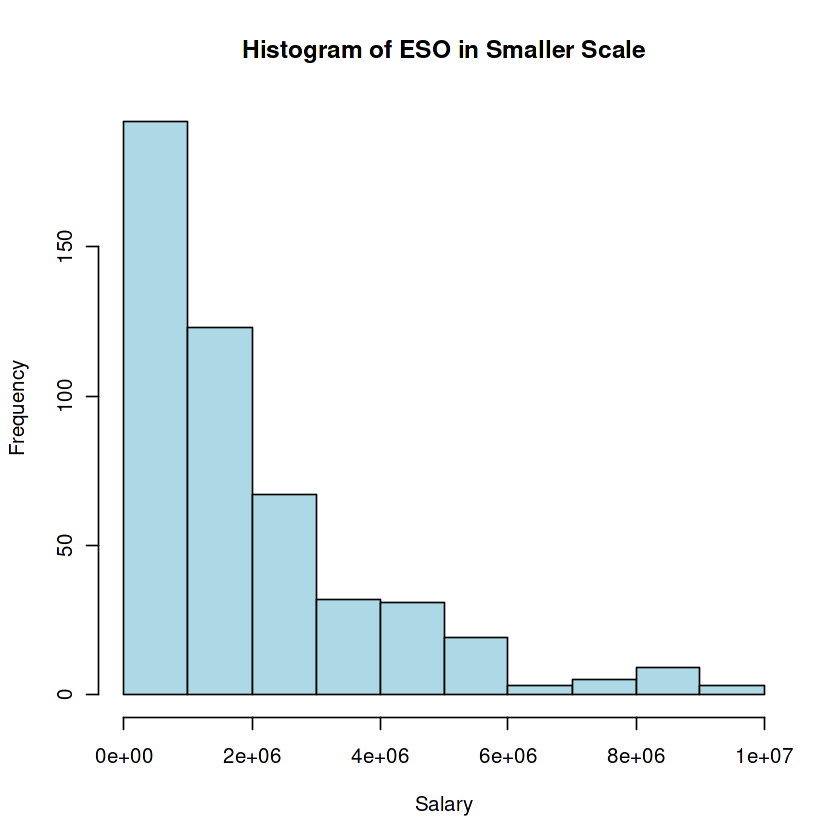

In [5]:
# Boxplot
ggplot(enron, aes(y = exercised_stock_options)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(y = "Exercised Stock Options", title = "Boxplot of Exercised Stock Options")

# Plot the histogram on a smaller scale to get a more precise observation.
hist(enron$exercised_stock_options[enron$exercised_stock_options < 1e7],
     main = "Histogram of ESO in Smaller Scale",
     xlab = "Salary",
     ylab = "Frequency",
     col = "lightblue")

print("Names of people exercising stock options much more than others:")
unusual_trader = subset(enron, enron$exercised_stock_options > 4e6)
print(unusual_trader$X)

# Record candidate outliers.
outliers_uni_ESO  = unusual_trader
outliers_bi_SnESO = merge(outliers_uni_S, unusual_trader, all = "True")
outliers_multi    = merge(outliers_uni_S, unusual_trader)

## Bonus

[1] "Names of people receiving bonus much more than others:"
 [1]   5   7  10  20  21  22  24  25  26  27  28  29  33  35  39  40  43  44  46
[20]  47  48  49  50  51  53  56  57  58  59  68  97 117 123 125 130 144 160 199
[39] 208 209 215 227 245 248 272 314 316 319 322 330 380 383 397 402 415 425 430
[58] 431 454 457


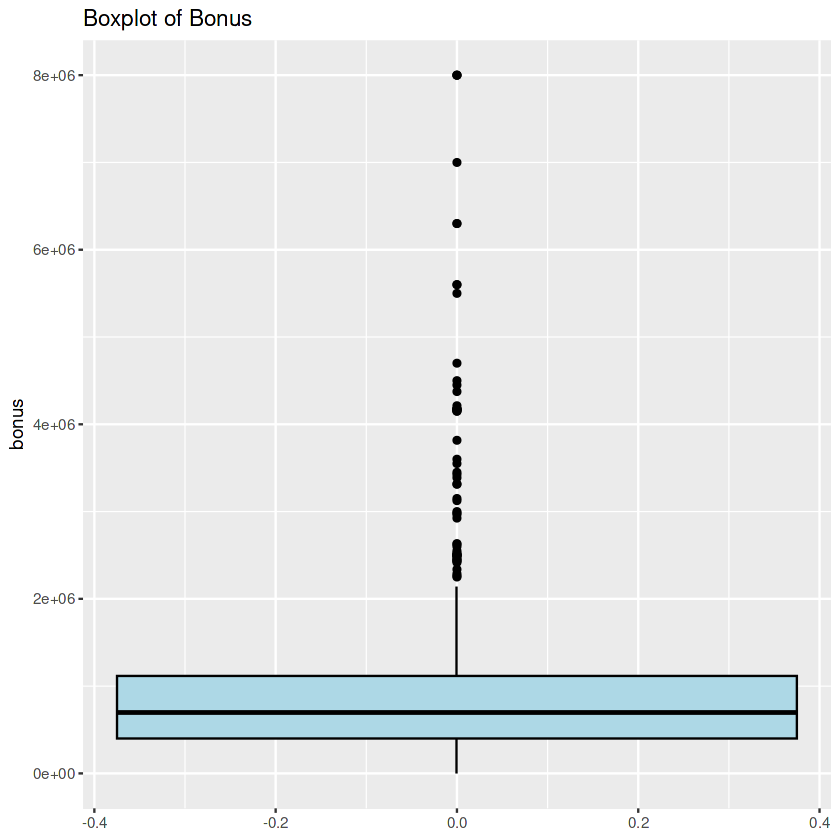

In [6]:
# Boxplot
ggplot(enron, aes(y = bonus)) +
  geom_boxplot(fill = "lightblue", color = "black") +
  labs(y = "bonus", title = "Boxplot of Bonus")
print("Names of people receiving bonus much more than others:")
unusual_bonus_receiver = subset(enron, enron$bonus > 2e6)
print(unusual_bonus_receiver$X)

# Record candidate outliers.
outliers_uni_B  = unusual_bonus_receiver
outliers_bi_SnB = merge(outliers_uni_S, unusual_bonus_receiver, all = "True")
outliers_multi  = merge(outliers_multi, unusual_bonus_receiver)

# Bivariate Analysis

[1] "Names of people ranking high however exercising stock options unusually:"
[1] 22 35
[1] "Names of people exercising stock options unusually:"
 [1]  0  7 10 12 21 22 24 26 29 33 35 36 40 41 44 47 48 51 53


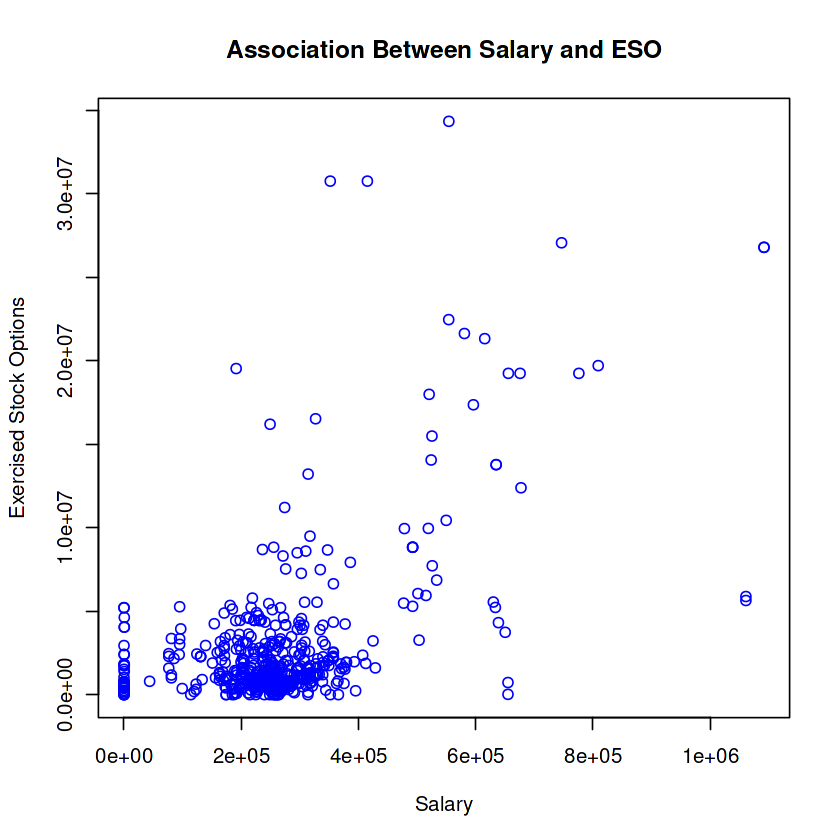

In [7]:
# Scatter of Salary and Exercised Stock Options
plot(enron$salary, enron$exercised_stock_options,
     main = "Association Between Salary and ESO",
     xlab = "Salary",
     ylab = "Exercised Stock Options",
     col = "blue")

print("Names of people ranking high however exercising stock options unusually:")
poi_leader = subset(enron, (enron$salary > 9e5 & enron$exercised_stock_options >= 1.5e7))
print(poi_leader$X)

print("Names of people exercising stock options unusually:")
poi_trader = subset(enron, enron$exercised_stock_options >= 1.5e7)
print(poi_trader$X)

# Record candidate outliers.
outliers_bi_SnESO = merge(outliers_bi_SnESO, poi_leader)
outliers_multi    = merge(outliers_multi, poi_leader)

[1] "Names of people receiving bonus over 10 times of their salary:"
 [1]  68 125 130 199 215 227 245 248 272 314 380 383 430 431
[1] "Names of people receiving unusually numerous bonus:"
 [1]  21  22  29  35  39  53  56  68 117 125 130 199 215 227 245 248 272 314 380
[20] 383 430 431


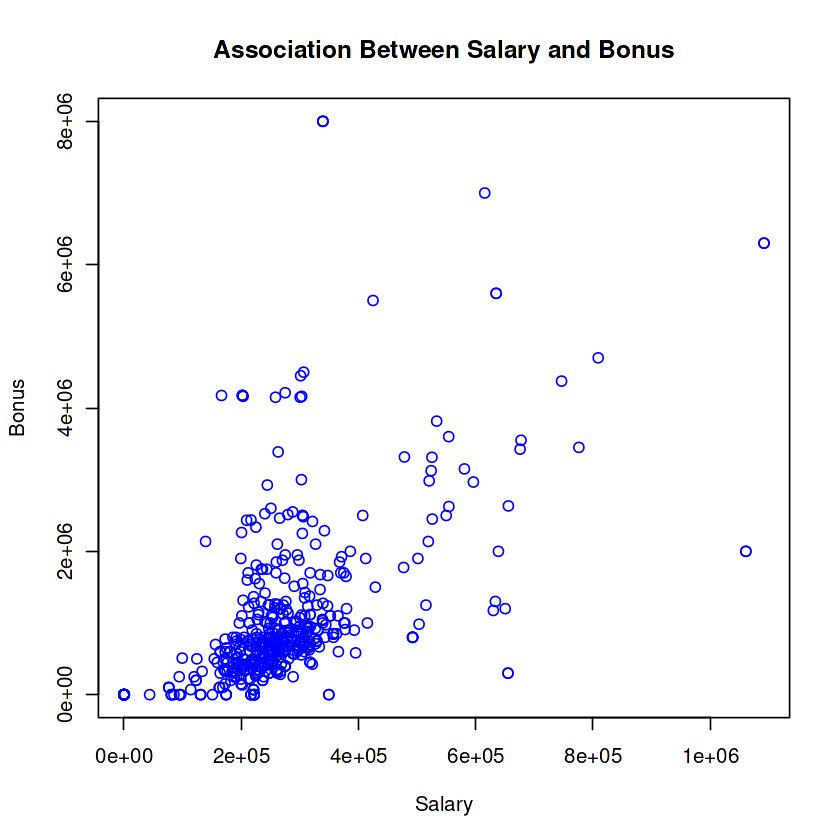

In [8]:
# Scatter of Salary and Bonus
plot(enron$salary, enron$bonus,
     main = "Association Between Salary and Bonus",
     xlab = "Salary",
     ylab = "Bonus",
     col = "blue")

print("Names of people receiving bonus over 10 times of their salary:")
unusual_bonus_emploee = subset(enron, enron$salary < 4e5 & enron$bonus >= 4e6)
print(unusual_bonus_emploee$X)

print("Names of people receiving unusually numerous bonus:")
poi_bonus_receiver = subset(enron, enron$bonus >= 4e6)
print(poi_bonus_receiver$X)

# Record candidate outliers.
outliers_uni_B  = merge(outliers_uni_B, unusual_bonus_emploee, all = "True")
outliers_bi_SnB = merge(outliers_bi_SnB, poi_bonus_receiver)
outliers_multi  = merge(outliers_multi, poi_bonus_receiver)

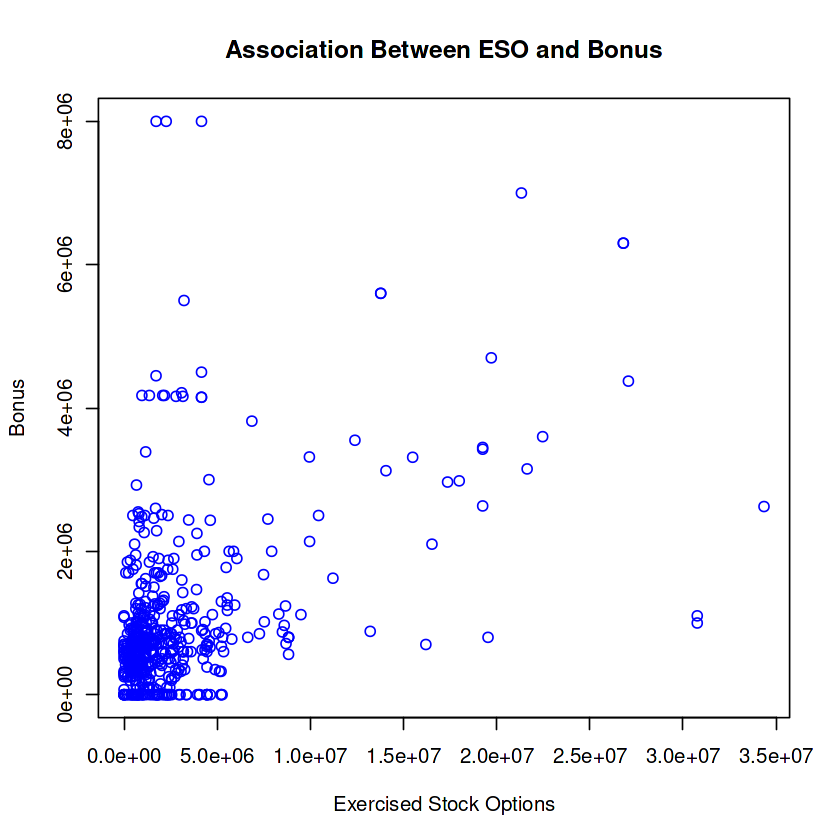

In [9]:
# Scatter of ESO and Bonus
plot(enron$exercised_stock_options, enron$bonus,
     main = "Association Between ESO and Bonus",
     xlab = "Exercised Stock Options",
     ylab = "Bonus",
     col = "blue")

# Multivariate Analysis

'data.frame':	510 obs. of  21 variables:
 $ X                        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ salary                   : num  351866 229215 275804 274111 271260 ...
 $ to_messages              : num  1825 1505 1035 975 2245 ...
 $ deferral_payments        : num  18934 0 214678 0 0 ...
 $ total_payments           : num  1150065 890141 809184 384677 1289452 ...
 $ loan_advances            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ bonus                    : num  1100000 1116667 1016667 1625000 1125000 ...
 $ restricted_stock_deferred: num  0 0 0 0 0 0 0 0 0 0 ...
 $ deferred_income          : num  -189531 -1689756 -1802193 -3310698 -248750 ...
 $ total_stock_value        : num  11322123 4795099 9281182 13606121 4837616 ...
 $ expenses                 : num  41722 62446 65036 44979 40146 ...
 $ from_poi_to_this_person  : num  149 94.3 43 37 128.5 ...
 $ exercised_stock_options  : num  30766064 4743760 7530673 11213576 8308552 ...
 $ from_messages            : num  44.5 64 38.7 25 96.5 ...

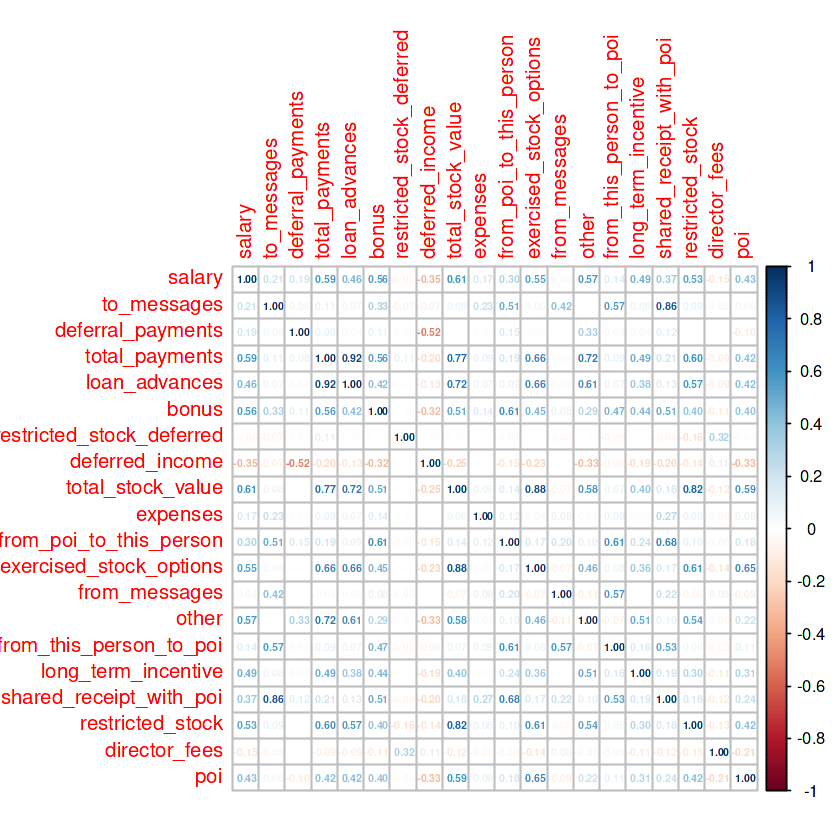

In [10]:
# Figure out the non-numeric variables and process them appropriately.

# Print the data structure of ENRON dataset
str(enron)

# Remove Name and Email_address elements, 
# and transform poi data from character to numeric type.
# enron_mat = select(enron, -c(X, email_address)) %>%
enron_mat = select(enron, -c(X)) %>%
            mutate(poi = ifelse(poi == "True",1.0,0.0)) %>%
            cor()

# Plot correlations among selected attributes
corrplot(enron_mat,method="number", number.cex = 0.5)

# Outlier Analysis

[1] "Names of multivariate outliers:"
[1] 22 35
[1] "Names of outstanding emploees:"
 [1]  68  97 117 123 125 130 144 160 199 208 209 215 227 245 248 272 314 316 319
[20] 322 330 380 383 397 402 415 425 430 431 454 457
[1] enron.X                       enron.salary                 
[3] enron.bonus                   enron.exercised_stock_options
<0 rows> (or 0-length row.names)


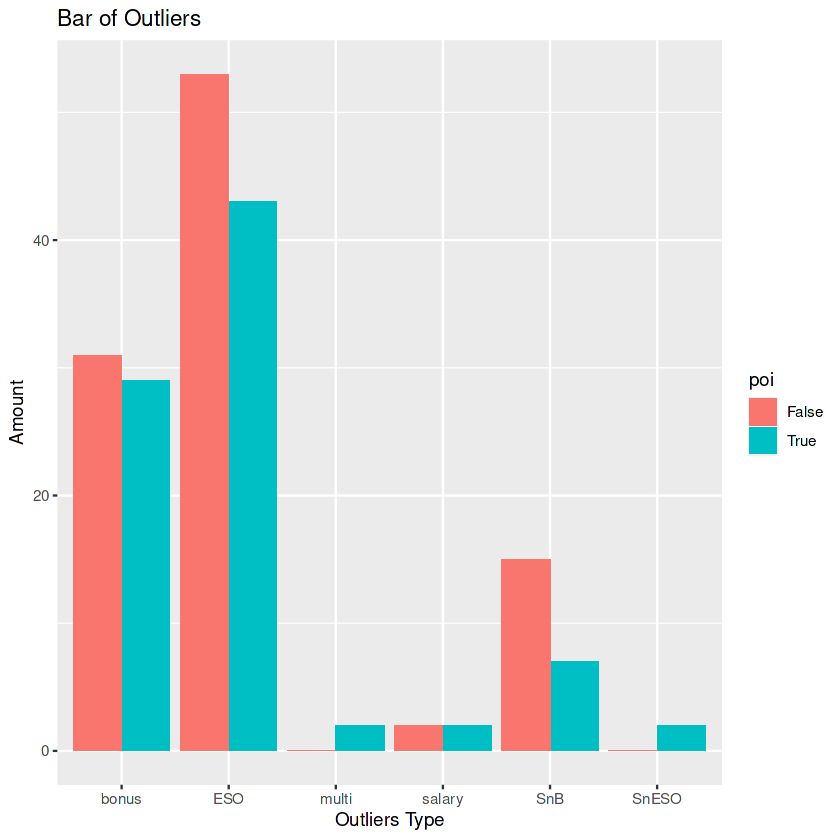

In [11]:
outlier_set = data.frame(
                var = c(rep("salary", each = 2), 
                        rep("ESO", each = 2), 
                        rep("bonus", each = 2), 
                        rep("SnESO", each = 2), 
                        rep("SnB", each = 2), 
                        rep("multi", each = 2)),
                value = c(length(outliers_uni_S$poi[outliers_uni_S$poi == "True"]),
                          length(outliers_uni_S$poi[outliers_uni_S$poi == "False"]),
                          length(outliers_uni_ESO$poi[outliers_uni_ESO$poi == "True"]),
                          length(outliers_uni_ESO$poi[outliers_uni_ESO$poi == "False"]),
                          length(outliers_uni_B$poi[outliers_uni_B$poi == "True"]),
                          length(outliers_uni_B$poi[outliers_uni_B$poi == "False"]),
                          length(outliers_bi_SnESO$poi[outliers_bi_SnESO == "True"]),
                          length(outliers_bi_SnESO$poi[outliers_bi_SnESO == "False"]),
                          length(outliers_bi_SnB$poi[outliers_bi_SnB$poi == "True"]),
                          length(outliers_bi_SnB$poi[outliers_bi_SnB$poi == "False"]),
                          length(outliers_multi$poi[outliers_multi$poi == "True"]),
                          length(outliers_multi$poi[outliers_multi$poi == "False"])
                         ),
                poi = rep(c("True", "False"),6)
    )

ggplot(outlier_set,aes(x = var,y = value))+
    geom_bar(stat = 'identity',aes(fill = poi),position = position_dodge(0.9)) +
    labs(x = "Outliers Type", y = "Amount", title = "Bar of Outliers")

print("Names of multivariate outliers:")
print(outliers_multi$X)
print("Names of outstanding emploees:")
print(outliers_uni_B$X[outliers_uni_B$poi == "False"])

# Special outlier
LJJ = subset(data.frame(enron$X, enron$salary, enron$bonus,enron$exercised_stock_options), 
            enron$X == "LAVORATO JOHN J")
print(LJJ)